# Week 1
## Exercise 1.1
__Assignment__: Write a command that finds the 10 most popular words in a file.

Firstly, we load the file and separate its word into lines using the _tr_ command. Then we make all the words lowercase to make the processing case insensitive. After that, we remove unwanted characters and empty lines that can arise from formatting or errors in the document. We get and count the unique words in the document with the _unique_ command, having previously sorted the words so that it requieres less computational cost to get the unique words. Finally we sort the unique counted words in decreasing order and obtain the last top words. We achieved this by running following shell command :

```shell
tr -c '[:alnum:]' '[\n*]' < chap_sec_subsec.txt | tr '[:upper:]' '[:lower:]' \
    | awk -F "'" '{print $1}' | sed 's/[^a-zA-Z]//g' \
    | awk 'NF' | sort | uniq -c | sort -nr | head  -10
```
__Commands explanation__

```shell
# adding new line before every word and loading the file as input
tr '[:alnum:]' '[\n*]'
#replacing all upper case characters with lower case characters   
tr '[:upper:]' '[:lower:]' 
#removing rest of the word after character '   
awk -F "'" '{print $1}' 
#removing special characters and numbers
sed 's/[^a-zA-Z]//g' 
#removing all empty lines   
awk 'NF' 
#sorting words   
sort 
#counting unique words    
uniq -c 
#showing only first ten results   
head -10 
```

__Testing__ :   
We tested our command with following file _chap_sec_subsec.txt_ (available from https://goo.gl/FOlaFN) and then we compared our results with online word frequency counter available at URL http://www.writewords.org.uk/. 

Results from our command: 
```
28  the
11  of
10  to
9   you
9   as
9   a
8   command
6   section
6   chapter
5   in
```

Results from online word counter: 
```
28  the
11  of
10  to
9   you
9   as
9   a
8   command
6   section
6   chapter
5   in
```
Command passed the test.

## Exercise 1.2
__Assignment__: Put this data (https://www.dropbox.com/s/d5c4x905w4jelbu/cars.txt?dl=0) into a file and write a command that removes all rows where the price is more than 10,000$.

__Solution:__ 

We solved this assigment with a single command which loads _cars.txt_ and then filters out the lines which are not satisfying defined condition in the fifth row. Then the output is written back into the file using the pipe '>'.

```shell
# store line only if 5-th row value is lower\equal to 10k
awk '($5 <= 10000)' cars.txt  > cars.txt
```

__Testing:__

_cars.txt_ before calling the command:
```
plym    fury    77      73      2500
chevy   nova    79      60      3000
ford    mustang 65      45      17000
volvo   gl      78      102     9850
ford    ltd     83      15      10500
Chevy   nova    80      50      3500
fiat    600     65      115     450
honda   accord  81      30      6000
ford    thundbd 84      10      17000
toyota  tercel  82      180     750
chevy   impala  65      85      1550
ford    bronco  83      25      9525
```

_cars.txt_  after calling the command: 
```
plym    fury    77      73      2500
chevy   nova    79      60      3000
volvo   gl      78      102     9850
Chevy   nova    80      50      3500
fiat    600     65      115     450
honda   accord  81      30      6000
toyota  tercel  82      180     750
chevy   impala  65      85      1550
ford    bronco  83      25      9525
```

## Exercise 1.3
__Assignment__: Using this file (https://www.dropbox.com/s/tjv9pyfrd9ztx8r/dict?dl=0) as a dictionary, write a simple spellchecker that takes input from stdin or a file and outputs a list of words not in the dictionary. One solution gets 721 misspelled words in this Shakespeare file (https://www.dropbox.com/s/bnku7grfycm8ii6/shakespeare.txt?dl=0).

__Solution:__  
We solved this exercise in a similar way than Exercise 1.1, but in this case, after preprocesing the words, we didn't find their unique instances but rather removed duplicates and sort them for easier posterior comparison. Using the command _comm_ we compared the postprocessed words in the file with the ones in the dictionary and printed the typos.


```shell
 #convert shakespeare.txt to file with separated words
tr -c '[:alnum:]' '[\n*]' <  shakespeare.txt \
    | awk -F"'" '{print $1}'| sed 's/[^a-zA-Z0-9]//g' \
    | awk 'NF' | tr '[:upper:]' '[:lower:]' > listofwords.txt

#convert all words in dictionary to lower case
sort dict | tr '[:upper:]' '[:lower:]' > dict.txt 
#sort words and remove duplicates
sort listofwords.txt | awk '!seen[$0]++' > words.txt 
#compare dictionary with words from shakespeare and print number of typos
comm -23 words.txt dict.txt | wc -l  
```

We found 721 words which are not in dictionary. Random sample from words marked as typos : 
```
corners
coroners
couldst
counsellors
countercheque
counterfeited
counterfeiting
couples
courtiers
cousins
cowards
cradles
cramm
crammed
cries
crowns
cuckoldly
cured
curs
deceived
```
It is obvious that this spellchecker is not perfect and we can theoretically improve performance by adding plural words to dictionary.


## Exercise 1.4
__Assignment__: Launch a t2.micro instance on Amazon EC2. Log onto the instance, create some files and install some software (for example git).

__Solution__:  
We created t2.micro instance, created some files and installed git - this can be seen on following screenshot. 


![t2.micro instance](figures/ex1_4.png)


## Exercise 1.5
__Assigment__: Create a few files locally on your computer. Create a new repository on Github and push your files to this repository. Log on to a t2.micro instance on Amazon EC2 and clone your repository there. Make some changes to the files, push them again and pull the changes on your local machine.

__Solution__:   
We created the Github repository https://github.com/magicadu/BD_EX_1.5:

![Github repository https://github.com/magicadu/BD_EX_1.5](figures/ex1_5_1.png)

Then we pushed the cloned repository to both local and Amazon machine. Afterwards, we changed files and pushed changes from both machines. This can be seen in commits history(https://github.com/magicadu/BD_EX_1.5/commits/master) and on the following screenings.

![Commits 1](figures/ex1_5_2.png)
![Commits 2](figures/ex1_5_3.png)


# Week 2
## Exercise 2.1
__Assignment__: Write a script with two methods. The first method should read in a matrix like the one here and return a list of lists. The second method should do the inverse, namely take, as input, a list of lists and save it in a file with same format as the initial file. The first method should take the file name as a parameter. The second method should take two arguments, the list of lists, and a filename of where to save the output.

__Solution__:   
The functions requested are defined in the following code. We have added _try-catch_ control blocks in order to handle possible basic exeptions. We also use the _map_ function to run the code quicker than a regular loop. The code is pretty straight forward. We consider the numbers in "string" format.

In [1]:
def loadMatrixFromFile(filename):
    try:
        file = open(filename, 'r+')
        matrix = list()
        #read line by line and split numbers
        with file as openedFileObject:
            for line in openedFileObject:
                matrix.append(line.split())
        file.close()
        return matrix

    except IOError:
        print "Error: File does not appear to exist."
        return 0

def storeMatrixInFile(matrix, filename):
    try:
        file = open(filename, 'w+')
        for line in matrix:
            #convert the numbers to string with spaces inbetween
            line = map(lambda x: x + ' ', line)
            line.append('\n')
            file.writelines(line)
        file.close()

    except IOError:
        print "Error: Unable to create file."
        return 0

__Testing__ :   
We are testing our methods with two files. First file contained following matrix : 
```
0 1 1 3 0
0 2 3 4 10
8 2 2 0 7
```

And the second one:
```
0 1 1 3 0 0 1 1 3 0
0 2 3 4 10 0 1 1 3 0
8 2 2 0 7 0 1 1 3 0
```
We will load, save and load the matrices and then compare if they are equal. If they are equal both methods should be working. We have also made other tests to fully check it.

In [4]:
from pprint import pprint
testsResults = list() 

#testing loadMatrixFromFile
matrix1 = loadMatrixFromFile('data/matrix1.txt')
print "matrix1"
pprint(matrix1)

#testing storeMatrixInFile
storeMatrixInFile(matrix1,'data/matrix1_stored.txt')
matrix1_stored = loadMatrixFromFile('data/matrix1_stored.txt')
print "matrix1_stored"
pprint(matrix1_stored)
#test if matrix1 is the same as matrix_stored
testsResults.append(matrix1 == matrix1_stored)
print "\n"

#testing loadMatrixFromFile
matrix2 = loadMatrixFromFile('data/matrix2.txt')
print "matrix2"
pprint(matrix2)

#testing storeMatrixInFile
storeMatrixInFile(matrix2,'data/matrix2_stored.txt')
matrix2_stored = loadMatrixFromFile('data/matrix2_stored.txt')
print "matrix2_stored"
pprint(matrix2_stored)
#test if matrix is the same as matrix_stored
testsResults.append(matrix2 == matrix2_stored) 
print "\n"

#test if all matrices were the same
if(all(test == 1 for test in testsResults)):
    print "Test passed"
else:
    print "Test failed"

matrix1
[['0', '1', '1', '3', '0'],
 ['0', '2', '3', '4', '10'],
 ['8', '2', '2', '0', '7']]
matrix1_stored
[['0', '1', '1', '3', '0'],
 ['0', '2', '3', '4', '10'],
 ['8', '2', '2', '0', '7']]


matrix2
[['0', '1', '1', '3', '0', '0', '1', '1', '3', '0'],
 ['0', '2', '3', '4', '10', '0', '1', '1', '3', '0'],
 ['8', '2', '2', '0', '7', '0', '1', '1', '3', '0']]
matrix2_stored
[['0', '1', '1', '3', '0', '0', '1', '1', '3', '0'],
 ['0', '2', '3', '4', '10', '0', '1', '1', '3', '0'],
 ['8', '2', '2', '0', '7', '0', '1', '1', '3', '0']]


Test passed


## Exercise 2.2
__Assignment__: Write a script that takes an integer N, and outputs all bit-strings of length N as lists. For example: 3 -> [0,0,0], [0,0,1],[0,1,0],[0,1,1],[1,0,0],[1,0,1],[1,1,0],[1,1,1]. As a sanity check, remember that there are 2^N such lists.

__Solution__:  
We solved this problem building a recursive function.

In [5]:
def generateBitStrings(N):
    #empty list which will be filled later
    temp = list([None] * N) 
    output = list()
    #closure, generate bit by bit all possible combinations
    def recursiveBitFunction(N):
        if(N <= 0):
            output.append(temp[:])
        else:
            temp[N-1] = 0
            recursiveBitFunction(N-1)
            temp[N-1] = 1
            recursiveBitFunction(N-1)
    #init the method
    recursiveBitFunction(N)
    return output

def generateBitStrings1(N):
    output = list()
    for i in range(0,2**(N)):
        output.append(bin(i)[2:].zfill(N))
    return output

__Testing__:  
Testing is done by generating bit-string for N from 1 to 20, each time we are checking if we are satisfying the rule 2^N and for small N we are also printing generated strings.

In [6]:
from pprint import pprint

testsResults = list() 
for N in range(1,20):
    bins = generateBitStrings(N)
    # check rule 2^N
    testsResults.append(len(bins) == 2**N) 
    if(N < 4):
        print('Bit-string generated for N=' + str(N))
        pprint(bins)
        print('\n')

if(all(test == 1 for test in testsResults)):
    print "Test passed"
else:
    print "Test failed"   

Bit-string generated for N=1
[[0], [1]]


Bit-string generated for N=2
[[0, 0], [1, 0], [0, 1], [1, 1]]


Bit-string generated for N=3
[[0, 0, 0],
 [1, 0, 0],
 [0, 1, 0],
 [1, 1, 0],
 [0, 0, 1],
 [1, 0, 1],
 [0, 1, 1],
 [1, 1, 1]]


Test passed


## Exercise 2.3
__Assignment__: Write a script that takes this file (from this Kaggle competition), extracts the request_text field from each dictionary in the list, and construct a bag of words representation of the string (string to count-list).

__Solution:__  

This problem was solved using the following logic: 

- We loaded the json object and extracted the 'request_text' plain text.

- We filtered out special characters, divided it into words (tokenization), turned into lowe case and removed punctuation, stopwords and removed the endings of the words (lemmatization).

- We created dictionary of all unique words and assign to every one of them thevalue 0 representing count.

- We used this dictionary with one 'request_text' entry and filled it with counts of words used in that entry.

- We added a copy of filled dictionary to output list and reset values to zeros

- We did the last two steps for every 'request_text' entry

In [7]:
import json
from pprint import pprint
import re
#using defaultdict for speed
from collections import defaultdict 


import unicodedata
from nltk.tokenize import word_tokenize, wordpunct_tokenize, sent_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords

## TEXT PREPROCESSING FUNCTIONS 

def doc_preprocess(document, mode = 0):
    # Preprocesees a document:  Tokenization, lemmatization...
    if (mode == 1):print document
    document = strip_accents(document)
    if (mode == 1):print document
    document = doc_tokeniz(document,mode) 
    if (mode == 1):print document
    document = doc_lowercase(document,mode)
    if (mode == 1):print document
    document = doc_rem_punctuation(document,mode) 
    if (mode == 1):print document
    document = doc_rem_stopwords(document,mode) 
    if (mode == 1):print document
    document = doc_stem(document,mode) 
    if (mode == 1):print document
    return document

def strip_accents(s):
   return ''.join(c for c in unicodedata.normalize('NFD', s)
                  if unicodedata.category(c) != 'Mn')

def doc_tokeniz(document, mode):
    tokens = word_tokenize(document) 
    return tokens
    
def doc_lowercase (document, mode):
    low_text = [w.lower() for w in document] 
    return low_text
    
def doc_rem_stopwords(document, mode):
    stopwords_en = stopwords.words('english')
    clean_text = [word for word in document if not word in stopwords_en]
    return clean_text
    
def doc_stem(document, mode):
    stemmer = SnowballStemmer('english')
    steammed_text = [stemmer.stem(word)for word in document]
    return steammed_text
    
def doc_rem_punctuation(document, mode):
    clean_text = [w for w in document if w.isalnum()]
    return clean_text


def loadJsonFromFile(filename):
    try:
        with open(filename) as data_file:
            jsonData = json.load(data_file)
        # return created json object
        return jsonData

    except IOError:
        print "Error: File does not appear to exist."
        return 0

#method will return list filled with lowercase words 
#from fieldName in jsonData
def getFilteredFieldFromJson(jsonData,fieldName):
    filteredJson = list()
    for entry in jsonData:
        fieldData = entry[fieldName]
        #converting all lines to lowercase words 
        #and filtering unwanted characters
        # fieldData = re.sub(r'[^\w]', ' ', fieldData).lower() 
        fieldData = doc_preprocess(fieldData)
        filteredJson.append(fieldData)
    return filteredJson

#create dicionary with all unique words in filteredField
def createDictWithUniqueWords(filteredField):
    wordsDict = defaultdict(int)
    for entry in filteredField:
        for word in entry:
            if str(word) not in wordsDict:
                wordsDict[str(word)] = 0
    return wordsDict

#fill dictionary with count of words from rowData
def fillDictWithRowValues(wordsDict, rowData):
    for word in rowData:
        wordsDict[word] += 1
    return wordsDict

#return BOW Representation from filteredField
def getBagOfWords(filteredField):
    wordsDict = createDictWithUniqueWords(filteredField)
    matrix = list()
    for entry in filteredField:
        # set all values to 0
        wordsDict = wordsDict.fromkeys(wordsDict, 0) 
        # Perform BoW of th entry
        wordsDict = fillDictWithRowValues(wordsDict, entry) 
        matrix.append(wordsDict.values())
    return matrix

__Testing__:   

We loaded 'pizza-train.json' and created bag of words representation. We printed out dimensions of matrix and example data. Then we went through all request_text entries and checked if count of words added to bag of words representation is the same as number of words in entry.


In [8]:
jsonData = loadJsonFromFile('data/pizza-train.json')
filteredField = getFilteredFieldFromJson(jsonData, 'request_text')
bagOfWords = getBagOfWords(filteredField)

print "Bag of Words Matrix dimensions are: " + \
    str(len(bagOfWords)) +  "x" + str(len(bagOfWords[0])) + "\n"
print "Sample data\n"
print(bagOfWords[0][26:40])
print "\n"
testsResults = list() 

for entryN in range(0,len(filteredField)):
    BOWcount = sum([i for i in bagOfWords[entryN] if i >= 1])
    JSONcount = len(filteredField[entryN])
    testsResults.append(BOWcount == JSONcount)
    

if(all(test == 1 for test in testsResults)):
    print "Test passed"
else:
    print "Test failed"   

Bag of Words Matrix dimensions are: 4040x8289

Sample data

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]


Test passed


# Week 3
## Exercise 3.1
__Assignment__: Write a script which reads a matrix from a file like this one and solves the linear matrix equation Ax=b where b is the last column of the input-matrix and A is the other columns. It is okay to use the solve()-function from numpy.linalg. Does the result make sense?

__Solution:__
We solved this problem using numpy.linalg. To use linalg the matrix A must be square and full-ranked, which in this case is true, so the system has a determined solution. We checked that the obtained vector X solves the system so the solution makes sense.

In [58]:
import numpy as np
from IPython.display import display, HTML
#load data
data = np.loadtxt(open("data/data.txt","rb"),delimiter=",") 
A = data[:, 0:-1]
B = data[:,-1]
print "Matrix A"
display(A)
print "Result B"
display(B)
if(np.shape(A)[0] == np.shape(A)[1]):
    print "Matrix A is square."
if(np.linalg.matrix_rank(A) == len(A)):
    print "Matrix A is full ranked\n"

X = np.linalg.solve(A,B) #calculate solution
print "Solution is: " + str(X)

## Check that the solution solves the system
result = A.dot(X)
print "The estimated B is: "+str(result)

Matrix A


array([[  1.,   2.,   3.],
       [  6.,   9.,  12.],
       [  2.,   0.,   9.]])

Result B


array([  4.,   7.,  10.])

Matrix A is square.
Matrix A is full ranked

Solution is: [-5.09090909  1.18181818  2.24242424]
The estimated B is: [  4.   7.  10.]


__Testing:__  
We are testing solution with build in method numpy.allclose(). 

In [59]:
if(np.allclose(np.dot(A, X), B)==True):
    print "Test passed"
else:
    print "Test failed"       

Test passed


## Exercise 3.2
__Assignment__: Write a script that reads in this list of points (x,y), fits/interpolates them with a polynomial of degree 3. Solve for the (real) roots of the polynomial numerically using Scipy’s optimization functions (not the root function in Numpy). Does the result make sense (plot something to check).

__Solution:__ 

We use the function _np.polyfit()_ to interpolate the points using a polynomial of degree 3. Once it is done, we use _scipy.optimize.root()_ to obtain the roots of the polynomial previously obtained. We then draw a plot of the data points, the polynomial and the roots to visually check the results.

In [60]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy import optimize

#load data
data = np.loadtxt(open("data/data2.txt","rb"))

x = data[:,0]
y = data[:,1]
#fit to polynomial of degree 3 
eq = np.polyfit(x,y, 3)
print "Coefficients of the polynomial are " + str(eq)
#convert to usable object
p = np.poly1d(eq)

#find real root with optimaze.root
sol = optimize.root(p, [0,p(0)], method='krylov',tol=1e-10)
print "Real root is " + str(sol.x[0])

Coefficients of the polynomial are [ 2.99999264  1.00106185 -2.00736185  3.91800201]
Real root is -1.43463628748


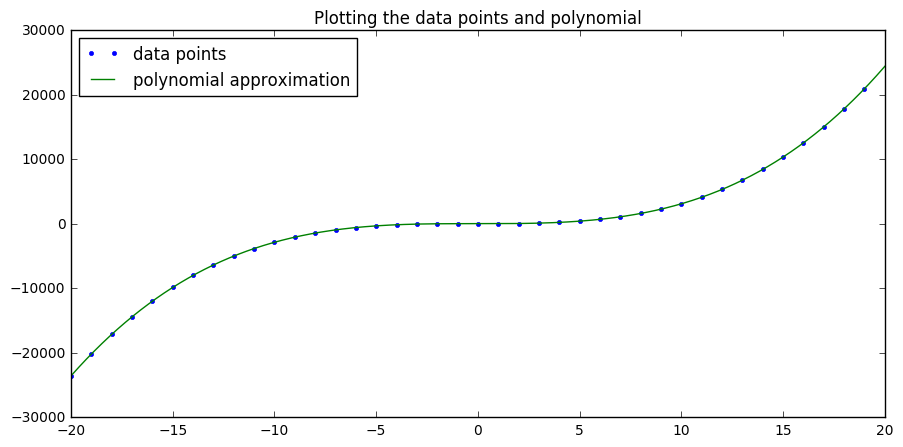

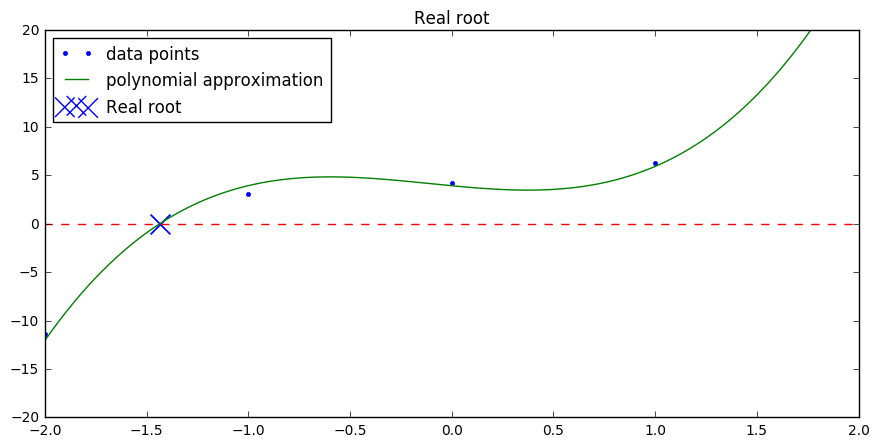

Test passed


In [61]:
#Points for zero line and polynomial approximation
xp = np.linspace(-20,20,10000)
zeros = np.zeros(10000)

#Plotting the polynomial 
fig = plt.gcf()
fig.set_size_inches(10.5, 5, forward=True)
plt.hold(True)
plt.title('Plotting the data points and polynomial')
plt.plot(x, y, '.', label = 'data points')
plt.plot(xp,p(xp),'-', label = 'polynomial approximation')
plt.legend(loc='upper left')
plt.show()

#Plot with limit -2, 2 
fig = plt.gcf()
fig.set_size_inches(10.5, 5, forward=True)
plt.xlim(-2,2)
plt.ylim(-20,20)
plt.hold(True)
plt.title('Real root')
plt.plot(x, y, '.', label = 'data points')
plt.plot(xp,p(xp),'-', label = 'polynomial approximation')
plt.plot(xp,zeros,'--')
plt.scatter(sol.x[0], p(sol.x[0]),s = 200, marker = 'x', \
            label = 'Real root')
plt.scatter(sol.x[1], p(sol.x[1]),s = 200, marker = 'x')
plt.legend(loc='upper left')
plt.show()



if(np.allclose(p(sol.x[0]), 0)==True):
    print "Test passed"
else:
    print "Test failed"      


__Testing:__   
We plotted points from the file, fitted polynomial and calculated solution to see if real root is in correct location. We also checked if results are correct with numpy.allclose().

## Exercise 3.3.1
__Assigment__: Using the movie-lens 1M data and pandas.read_table read in all three files (users, ratings, movies) into pandas DataFrames. 

__Solution:__

We simply read all the files separately using _pd.read_table()_ function, indicating the internal format of the data. Then we used the _pd.merge()_ function twice to merge the 3 files using the indexes _'user id'_ and _'movie_id'_ for the merging.

In [62]:
from IPython.display import display, HTML
import pandas as pd

#load users
usersHeader = 'user id, gender, age, occupation code, zip'.split(', ')
usersTable = pd.read_table('data/users.dat', sep="::", \
    engine='python', names = usersHeader)

#load ratings
ratingsHeader = 'user id, movie id, rating, timestamp'.split(', ')
ratingsTable = pd.read_table('data/ratings.dat', sep="::", \
    engine='python', names = ratingsHeader)

#load movies
moviesHeader = 'movie id, title, genre'.split(', ')
moviesTable = pd.read_table('data/movies.dat', sep = "::",  \
    engine='python', names = moviesHeader)

#merging dataframes
data = pd.merge(usersTable, ratingsTable, on='user id')
data = pd.merge(data, moviesTable, on='movie id')

display(HTML("<h4>Sample of merged movie-lens data</h4>"))
display(data.head())

,user id,gender,age,occupation code,zip,movie id,rating,timestamp,title,genre
0,1,F,1,10,48067,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,M,56,16,70072,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,M,25,12,32793,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,M,25,7,22903,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,M,50,1,95350,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama


## Exercise 3.3.2
__Assigment__: The 5 movies with the most number of ratings, The 3 movies with the highest average rating for females. Do the same for males, The 10 movies men liked much more than women and the 10 movies women liked more than men (use the difference in average ratings and sort ascending and descending), The 5 movies that had the highest standard deviation in rating.


__Solution:__   
We firstly prepared dataframe moviesFinal which contains information about men/woman ratings, difference and std. Then we just called _sort_ on dataframe to get requested results.

In [64]:
# count occurrence of unique movies
moviesCount = data['movie id'].value_counts()
# average rating for all users
moviesRating = data.groupby('movie id')['rating'].mean() 
# std for movies 
moviesRatingStd = data.groupby('movie id')['rating'].std()
# average rating for men
moviesRatingF = data[data['gender']=='F'].groupby('movie id')['rating'].mean() 
# average rating for women
moviesRatingM = data[data['gender']=='M'].groupby('movie id')['rating'].mean()

#select only movies with at least 250 ratings
moviesRating = moviesRating[moviesCount >= 250]
moviesRatingF = moviesRatingF[moviesCount >= 250]
moviesRatingM = moviesRatingM[moviesCount >= 250]
moviesRatingStd = moviesRatingStd[moviesCount >= 250]

#create new dataframe with all informations
moviesFinal = pd.DataFrame({ 'movie id':moviesRating.index , \
    'rating': moviesRating.values,'ratingM':moviesRatingM.values, \
    'ratingF':moviesRatingF.values,'ratingSTD':moviesRatingStd.values})
moviesFinal['diffMF'] = moviesFinal['ratingF']-moviesFinal['ratingM']
moviesFinal = pd.merge(moviesTable, moviesFinal, on='movie id')

#print results
display(HTML("<h4>5 best rated movies</h4>"))
display(moviesFinal.sort_values(by = 'rating', ascending=False).head(n=5))
display(HTML("<h4>3 best rated movies for womem</h4>"))
display(moviesFinal.sort_values(by = 'ratingF', ascending=False).head(n=3))
display(HTML("<h4>3 best rated movies for men</h4>"))
display(moviesFinal.sort_values(by = 'ratingM', ascending=False).head(n=3))
display(HTML("<h4>10 movies that liked women more than men</h4>"))
display(moviesFinal.sort_values(by = 'diffMF', ascending=False).head(n=10))
display(HTML("<h4>10 movies that liked men more than women</h4>"))
display(moviesFinal.sort_values(by = 'diffMF', ascending=True).head(n=10))
display(HTML("<h4>5 movies with highest std</h4>"))
display(moviesFinal.sort_values(by = 'ratingSTD', ascending=False).head(n=5))

,movie id,title,genre,rating,ratingF,ratingM,ratingSTD,diffMF
638,2019,Seven Samurai (The Magnificent Seven) (Shichin...,Action|Drama,4.560510,4.481132,4.576628,0.743607,-0.095496
93,318,"Shawshank Redemption, The (1994)",Drama,4.554558,4.539075,4.560625,0.700443,-0.021550
232,858,"Godfather, The (1972)",Action|Crime|Drama,4.524966,4.314700,4.583333,0.780721,-0.268634
212,745,"Close Shave, A (1995)",Animation|Comedy|Thriller,4.520548,4.644444,4.473795,0.667143,0.170650
24,50,"Usual Suspects, The (1995)",Crime|Thriller,4.517106,4.513317,4.518248,0.748822,-0.004931


,movie id,title,genre,rating,ratingF,ratingM,ratingSTD,diffMF
212,745,"Close Shave, A (1995)",Animation|Comedy|Thriller,4.520548,4.644444,4.473795,0.667143,0.170650
336,1148,"Wrong Trousers, The (1993)",Animation|Comedy,4.507937,4.588235,4.478261,0.708666,0.109974
255,922,Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),Film-Noir,4.491489,4.572650,4.464589,0.740924,0.108060


,movie id,title,genre,rating,ratingF,ratingM,ratingSTD,diffMF
232,858,"Godfather, The (1972)",Action|Crime|Drama,4.524966,4.314700,4.583333,0.780721,-0.268634
638,2019,Seven Samurai (The Magnificent Seven) (Shichin...,Action|Drama,4.560510,4.481132,4.576628,0.743607,-0.095496
93,318,"Shawshank Redemption, The (1994)",Drama,4.554558,4.539075,4.560625,0.700443,-0.021550


,movie id,title,genre,rating,ratingF,ratingM,ratingSTD,diffMF
313,1088,Dirty Dancing (1987),Musical|Romance,3.311499,3.790378,2.959596,1.168924,0.830782
796,2468,Jumpin' Jack Flash (1986),Action|Comedy|Romance|Thriller,2.770053,3.254717,2.578358,1.158052,0.676359
464,1380,Grease (1978),Comedy|Musical|Romance,3.577723,3.975265,3.367041,1.113264,0.608224
79,261,Little Women (1994),Drama,3.649123,3.870588,3.321739,0.932421,0.548849
1201,3844,Steel Magnolias (1989),Drama,3.593137,3.901734,3.365957,1.059021,0.535777
544,1688,Anastasia (1997),Animation|Children's|Musical,3.503289,3.800000,3.281609,0.988376,0.518391
843,2657,"Rocky Horror Picture Show, The (1975)",Comedy|Horror|Musical|Sci-Fi,3.291160,3.673016,3.160131,1.260177,0.512885
877,2739,"Color Purple, The (1985)",Drama,3.855556,4.158192,3.659341,1.042110,0.498851
126,412,"Age of Innocence, The (1993)",Drama,3.559322,3.827068,3.339506,0.919760,0.487561
139,455,Free Willy (1993),Adventure|Children's|Drama,2.589474,2.921348,2.438776,1.046403,0.482573


,movie id,title,genre,rating,ratingF,ratingM,ratingSTD,diffMF
352,1201,"Good, The Bad and The Ugly, The (1966)",Action|Western,4.133820,3.494949,4.221300,0.892027,-0.726351
1186,3760,"Kentucky Fried Movie, The (1977)",Comedy,3.481967,2.878788,3.555147,1.029421,-0.676359
68,231,Dumb & Dumber (1994),Comedy,3.192424,2.697987,3.336595,1.321333,-0.638608
975,3062,"Longest Day, The (1962)",Action|Drama|War,3.971591,3.411765,4.031447,0.876596,-0.619682
219,784,"Cable Guy, The (1996)",Comedy,2.729870,2.250000,2.863787,1.117925,-0.613787
397,1261,Evil Dead II (Dead By Dawn) (1987),Action|Adventure|Comedy|Horror,3.826642,3.297297,3.909283,1.120305,-0.611985
1136,3576,"Hidden, The (1987)",Action|Horror|Sci-Fi,3.683099,3.137931,3.745098,0.872588,-0.607167
773,2410,Rocky III (1982),Action|Drama,2.875312,2.361702,2.943503,1.053287,-0.581801
1131,3552,Caddyshack (1980),Comedy,3.846949,3.396135,3.969737,1.044233,-0.573602
1157,3681,For a Few Dollars More (1965),Western,3.916923,3.409091,3.953795,0.858431,-0.544704


,movie id,title,genre,rating,ratingF,ratingM,ratingSTD,diffMF
68,231,Dumb & Dumber (1994),Comedy,3.192424,2.697987,3.336595,1.321333,-0.638608
863,2710,"Blair Witch Project, The (1999)",Horror,3.031528,3.038732,3.029381,1.316368,0.009351
83,288,Natural Born Killers (1994),Action|Thriller,3.144286,3.192982,3.134812,1.307198,0.058170
95,327,Tank Girl (1995),Action|Comedy|Musical|Sci-Fi,2.614525,2.901408,2.543554,1.277695,0.357854
843,2657,"Rocky Horror Picture Show, The (1975)",Comedy|Horror|Musical|Sci-Fi,3.291160,3.673016,3.160131,1.260177,0.512885


## Exercise 3.4
__Assignment__: Last week you read in a dataset for this Kaggle competition and created a bag-of-words representation on the review strings. Train a logistic regression classifier for the competition using your bag-of-words features (and possibly some of the others) to predict the variable “requester_received_pizza”. For this exercise, you might want to work a little bit more on your code from last week. Use 90% of the data as training data and 10% as test data.

__Solution:__  
We trained classifier using bag of words and then also using other features from dataset. Accuracy of classifier trained with bag of words (using relative frequencies) is around 75%, which is the same performance as guessing the most frequent output class. When we trained classifier also with other features we got accuracy 76 %, which is also similar. The dimensionaly of the input is around 8000, which is too high to allow a good prediction using a logistic regressor. Using TF-IDF features and a Naive Bayes classifies probably would lead to much better results.

In [123]:
from sklearn import linear_model, datasets
from sklearn.cross_validation import train_test_split
from random import randint

#load data
jsonData = loadJsonFromFile('data/pizza-train.json')
filteredField = getFilteredFieldFromJson(jsonData, 'request_text')
bagOfWords = getBagOfWords(filteredField)
jsonData = pd.read_json('data/pizza-train.json')

# Training only with bag of words
X = bagOfWords
y = jsonData['requester_received_pizza'].as_matrix()

logreg = linear_model.LogisticRegression()
scoreSum = np.array([])

## Obtain relative word frequency of each document.
X = np.array(X)
suma1 = np.sum(X, axis = 1)
#print suma1
for i in range(X.shape[0]):
    X[i] = X[i]/suma1[i];
print "Dimensionality of the Data: " + str(X.shape)

#train and test classifier multiple times on diffrent datasets, count mean score
for i in range(10):
    #generate test and train data
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=0.10, random_state=randint(1,10000))
    logreg.fit(X_train, y_train)
    #check performance
    scoreSum = np.append(scoreSum,\
        (logreg.score(X_test, y_test, sample_weight=None)))
    
print "Mean accuracy of classifier, trained only with bag of words is " \
    + str(np.mean(scoreSum))


#drop selected fields
jsonData = jsonData.drop('giver_username_if_known', 1)
jsonData = jsonData.drop('request_text', 1)
jsonData = jsonData.drop('request_text_edit_aware', 1)
jsonData = jsonData.drop('request_title', 1)
jsonData = jsonData.drop('request_id', 1)
jsonData = jsonData.drop('requester_subreddits_at_request',1 )
jsonData = jsonData.drop('requester_username', 1)
jsonData = jsonData.drop('requester_user_flair',1)
jsonData = jsonData.drop('requester_received_pizza', 1)

# Training with bag of words and others features from dataset
X = jsonData.as_matrix()
X = np.concatenate((X, bagOfWords), axis=1)


logreg = linear_model.LogisticRegression()
scoreSum = np.array([])

#train and test classifier multiple times on diffrent datasets, count mean score
for i in range(10):
    #generate test and train data
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=0.10, random_state=randint(1,10000))
    logreg.fit(X_train, y_train)
    #check performance
    scoreSum = np.append(scoreSum,\
        (logreg.score(X_test, y_test, sample_weight=None)))
    
print "Mean accuracy of classifier, trained with bag of words and other features is " \
    + str(np.mean(scoreSum))
print "Mean accuracy of classifier selecting most frequent class is around " \
    + str(len(y[y==0])/float(len(y[y==1])+len(y[y==0])))

Dimensionality of the Data: (4040, 8289)
Mean accuracy of classifier, trained only with bag of words is 0.764851485149
Mean accuracy of classifier, trained with bag of words and other features is 0.75396039604
Mean accuracy of classifier selecting most frequent class is around 0.75396039604


## Exercise 3.5
__Assignment__: Write a simple Python function for computing the sum with 10,000 terms (this should be around 1.644), 500 times in a row (to make the execution time measurable). Now compile the code with Cython and see how much speedup you can achieve by this. Remember to declare your variable types.

__Solution:__

We wrote methods using pure python and also cython using the same structure and functions. Then we ran the methods 5000 times and compared speed. Cython was running around 6.5 times faster then pure python.

In [70]:
%load_ext Cython

In [71]:
%%cython 
def sumTermsCython(int numOfTerms):
    cdef double sumOfTerms = 0
    for i in range(1,numOfTerms):
        sumOfTerms += 1/<double>(i*i)
    return sumOfTerms

In [72]:
def sumTermsPython(numOfTerms):
    sumOfTerms = 0
    for i in range(1,numOfTerms):
        sumOfTerms += 1/float(i*i)
    return sumOfTerms

In [124]:
import time
t = time.time()
[sumTermsCython(10000) for _ in range(5000)]
cythonTime = time.time() - t

t = time.time()
[sumTermsPython(10000) for _ in range(5000)]
pythonTime = time.time() - t

print "Running time for python is : " + str(pythonTime)
print "Running time for cython is " + str(cythonTime)
print "Ratio between python/cython is " + str(pythonTime/cythonTime)

Running time for python is : 10.350605011
Running time for cython is 1.63117003441
Ratio between python/cython is 6.34550953772
